In [1]:
import os

In [2]:
import sqlite3
import pandas as pd

In [3]:
#I have a csv inpatientCharges.csv
#I'm reading that csv into my python project and into a pandas dataframe
InpatientData_db = pd.read_csv('inpatientCharges.csv')

Creating a sql database that can be queried from in the next step

In [4]:
#taking that pandas dataframe and putting it in a new table named inpatientCharges
#in a new database named InpatientData which is a db filetype
#and if it exists, we will   replace it
InpatientData_db.to_sql("inpatientTable", sqlite3.connect("InpatientData.db"), if_exists = "replace");

C:\Users\Tiffany\Anaconda3\lib\site-packages\pandas\core\generic.py:2130: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  dtype=dtype)


Querying back the total discharges, average coverage charges, average total payments, and average medicare payments by provider state

In [5]:
#creating a connection, so python can find the database
con = sqlite3.connect('InpatientData.db')

In [6]:
#reading from the database using a sql query
#we're storing the results of the sql query to a dataframe
df = pd.read_sql_query("SELECT * FROM inpatientTable;",con)

In [7]:
df.head(3)

,index,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79


In [8]:
#### Inpatient Charges

In [9]:
#creating table of Total Discharges by State in descending order (highest to lowest)
con = sqlite3.connect('InpatientData.db')
dischargesByState = pd.read_sql_query('''select  
 `Provider State` 
,SUM(` Total Discharges `) as Total_Discharges
from inpatientTable
GROUP BY `Provider State` 
ORDER BY SUM(` Total Discharges `) DESC;''',con)
dischargesByState.head()

,Provider State,Total_Discharges
0,FL,536859
1,TX,479939
2,CA,474979
3,NY,435557
4,IL,361603


In [10]:
##make_graph("Total Discharges")
TotalDischargesByStatePlot = dischargesByState.plot.bar(x='Provider State', y='Total_Discharges', rot=0, figsize=(20,10))

In [11]:
#creating table of Average Coverage Charges by State in descending order (highest to lowest)
con = sqlite3.connect('InpatientData.db')
averageCoverageChargesByState = pd.read_sql_query('''select  
 `Provider State` 
,SUM(cast(replace(` Average Covered Charges `,'$','') as float)) as Average_Coverage_Charges
from inpatientTable
GROUP BY `Provider State`
ORDER BY Average_Coverage_Charges DESC;''',con)
averageCoverageChargesByState.head()

,Provider State,Average_Coverage_Charges
0,CA,8.819326e+08
1,FL,5.133111e+08
2,TX,4.921210e+08
3,NJ,3.191226e+08
4,PA,3.093034e+08


In [12]:
#averageCoverageChargesByState.describe()

In [13]:
averageCoverageChargesByState["Average_Coverage_Charges"].astype(int).head()

0    881932566
1    513311085
2    492121014
3    319122561
4    309303421
Name: Average_Coverage_Charges, dtype: int32

In [14]:
averageCoverageChargesByState['AvgCoverageCharges'] = averageCoverageChargesByState["Average_Coverage_Charges"].astype(int)

In [15]:
averageCoverageChargesByState.head()

,Provider State,Average_Coverage_Charges,AvgCoverageCharges
0,CA,8.819326e+08,881932566
1,FL,5.133111e+08,513311085
2,TX,4.921210e+08,492121014
3,NJ,3.191226e+08,319122561
4,PA,3.093034e+08,309303421


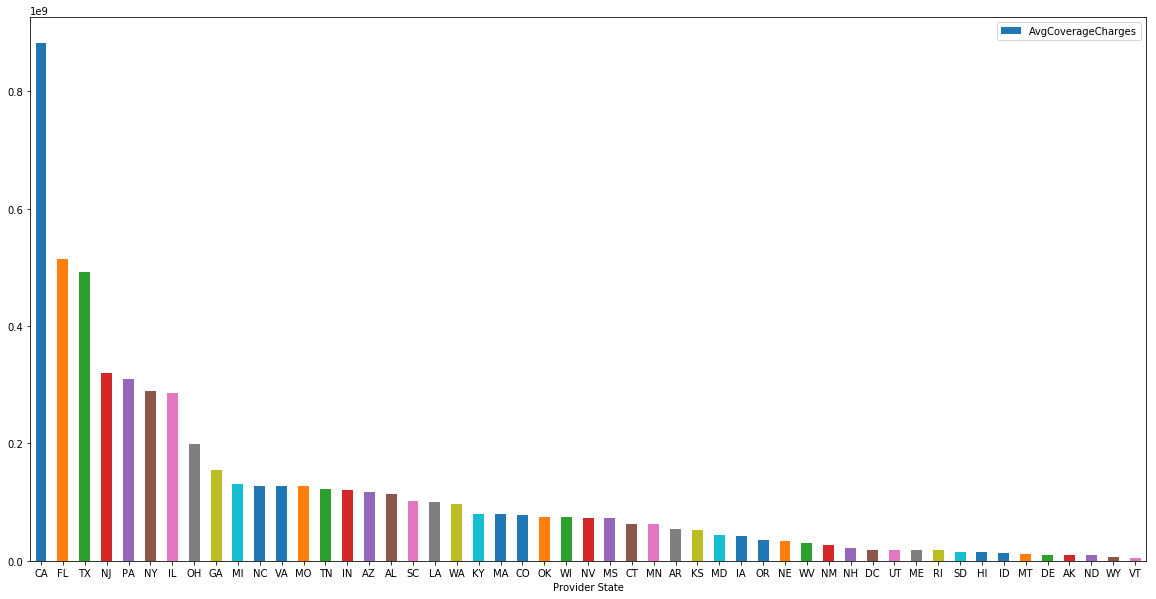

In [16]:
##make_graph("Average Covered Charges")
AverageCoverageChargesByStatePlot = averageCoverageChargesByState.plot.bar(x='Provider State', y='AvgCoverageCharges', rot=0, figsize=(20,10))


In [17]:
#creating table of Total Discharges by DRG's
con = sqlite3.connect('InpatientData.db')
dischargesByDRG = pd.read_sql_query('''select  
 `DRG Definition` 
,SUM(` Total Discharges `) as Total_Discharges
from inpatientTable
GROUP BY `DRG Definition` 
ORDER BY SUM(` Total Discharges `) LIMIT 5;''',con)
dischargesByDRG


,DRG Definition,Total_Discharges
0,419 - LAPAROSCOPIC CHOLECYSTECTOMY W/O C.D.E. ...,16157
1,203 - BRONCHITIS & ASTHMA W/O CC/MCC,16577
2,301 - PERIPHERAL VASCULAR DISORDERS W/O CC/MCC,16744
3,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,16952
4,315 - OTHER CIRCULATORY SYSTEM DIAGNOSES W CC,17478
